In [1]:
import sys 
from pathlib import Path
# sys.path.append(str(Path.cwd().parents[0] / "py"))

from model_class import Model

model = Model()

2023-12-07 23:34:40.535384: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
PATH_TO_FLOWERS = "../data/flowers"

In [3]:
data = model.load_data(PATH_TO_FLOWERS)

In [4]:
data.head(), data.tail()

(                                              images labels
 0  (((tf.Tensor([ 81. 103.  28.], shape=(3,), dty...  daisy
 1  (((tf.Tensor([30. 35.  3.], shape=(3,), dtype=...  daisy
 2  (((tf.Tensor([0. 0. 0.], shape=(3,), dtype=flo...  daisy
 3  (((tf.Tensor([22. 37. 12.], shape=(3,), dtype=...  daisy
 4  (((tf.Tensor([48. 58. 49.], shape=(3,), dtype=...  daisy,
                                                  images     labels
 4312  (((tf.Tensor([249. 252. 106.], shape=(3,), dty...  sunflower
 4313  (((tf.Tensor([79. 88. 92.], shape=(3,), dtype=...  sunflower
 4314  (((tf.Tensor([46. 62. 16.], shape=(3,), dtype=...  sunflower
 4315  (((tf.Tensor([222. 228. 243.], shape=(3,), dty...  sunflower
 4316  (((tf.Tensor([105. 104. 109.], shape=(3,), dty...  sunflower)

In [5]:
tulip = model.return_count_of_unique_flowers(data, "tulip")
print(tulip)

images    984
labels    984
dtype: int64


In [6]:
rose = model.return_count_of_unique_flowers(data, "rose")
print(rose)

images    784
labels    784
dtype: int64


In [7]:
daisy = model.return_count_of_unique_flowers(data, "daisy")
print(daisy)

images    764
labels    764
dtype: int64


In [8]:
dandelion = model.return_count_of_unique_flowers(data, "dandelion")
print(dandelion)

images    1052
labels    1052
dtype: int64


In [9]:
sunflower = model.return_count_of_unique_flowers(data, "sunflower")
print(sunflower)

images    733
labels    733
dtype: int64


In [10]:
model.get_dataframe_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  4317 non-null   object
 1   labels  4317 non-null   object
dtypes: object(2)
memory usage: 67.6+ KB


In [12]:
model.check_for_null_values(data)

images    0
labels    0
dtype: int64


In [13]:
model.return_unique_labels(data)

array(['daisy', 'rose', 'tulip', 'dandelion', 'sunflower'], dtype=object)

In [14]:
model.encode_labels(data)

,images,labels
0,"(((tf.Tensor([ 81. 103. 28.], shape=(3,), dty...",0
1,"(((tf.Tensor([30. 35. 3.], shape=(3,), dtype=...",0
2,"(((tf.Tensor([0. 0. 0.], shape=(3,), dtype=flo...",0
3,"(((tf.Tensor([22. 37. 12.], shape=(3,), dtype=...",0
4,"(((tf.Tensor([48. 58. 49.], shape=(3,), dtype=...",0
...,...,...
4312,"(((tf.Tensor([249. 252. 106.], shape=(3,), dty...",3
4313,"(((tf.Tensor([79. 88. 92.], shape=(3,), dtype=...",3
4314,"(((tf.Tensor([46. 62. 16.], shape=(3,), dtype=...",3
4315,"(((tf.Tensor([222. 228. 243.], shape=(3,), dty...",3


In [15]:
model.normalise_images(data)

,images,labels
0,(((tf.Tensor([0.31764707 0.40392157 0.10980392...,0
1,(((tf.Tensor([0.11764706 0.13725491 0.01176471...,0
2,"(((tf.Tensor([0. 0. 0.], shape=(3,), dtype=flo...",0
3,(((tf.Tensor([0.08627451 0.14509805 0.04705882...,0
4,(((tf.Tensor([0.1882353 0.22745098 0.19215687...,0
...,...,...
4312,(((tf.Tensor([0.9764706 0.9882353 0.41568628...,3
4313,(((tf.Tensor([0.30980393 0.34509805 0.36078432...,3
4314,(((tf.Tensor([0.18039216 0.24313726 0.0627451 ...,3
4315,(((tf.Tensor([0.87058824 0.89411765 0.9529412 ...,3


In [16]:
X, y = model.split_target_from_features(data)

In [17]:
X_train, X_test, X_val, y_train, y_test, y_val = model.split_train_test_val(X, y)

In [18]:
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((2762,), (864,), (691,), (2762,), (864,), (691,))

In [34]:
X_train, X_test, X_val = model.reshape_images(X_train, X_test, X_val)

In [19]:
y_train, y_test, y_val = model.convert_target_to_categorical(y_train, y_test, y_val)

In [32]:
build_model = model.build_model(filters=32, kernel=(3,3), strides=(2,2), dropout_rate=0.2,dense_units=128, lr=0.001,pooling_size=(2,2))

In [35]:
history = model.train_model(build_model, X_train, y_train, X_val, y_val, epochs=10, batch_size=32)

Epoch 1/10
87/87 [==============================] - 24s 251ms/step - loss: 1.3699 - accuracy: 0.4026 - val_loss: 1.1499 - val_accuracy: 0.5326
Epoch 2/10
87/87 [==============================] - 19s 214ms/step - loss: 1.1315 - accuracy: 0.5293 - val_loss: 1.0970 - val_accuracy: 0.5297
Epoch 3/10
87/87 [==============================] - 18s 211ms/step - loss: 1.0356 - accuracy: 0.5815 - val_loss: 1.0361 - val_accuracy: 0.5861
Epoch 4/10
87/87 [==============================] - 18s 206ms/step - loss: 0.9120 - accuracy: 0.6405 - val_loss: 0.9706 - val_accuracy: 0.6324
Epoch 5/10
87/87 [==============================] - 19s 216ms/step - loss: 0.7992 - accuracy: 0.6988 - val_loss: 0.9090 - val_accuracy: 0.6599
Epoch 6/10
87/87 [==============================] - 20s 233ms/step - loss: 0.6660 - accuracy: 0.7513 - val_loss: 0.8951 - val_accuracy: 0.6585
Epoch 7/10
87/87 [==============================] - 19s 220ms/step - loss: 0.5379 - accuracy: 0.8081 - val_loss: 0.8859 - val_accuracy: 0.6773

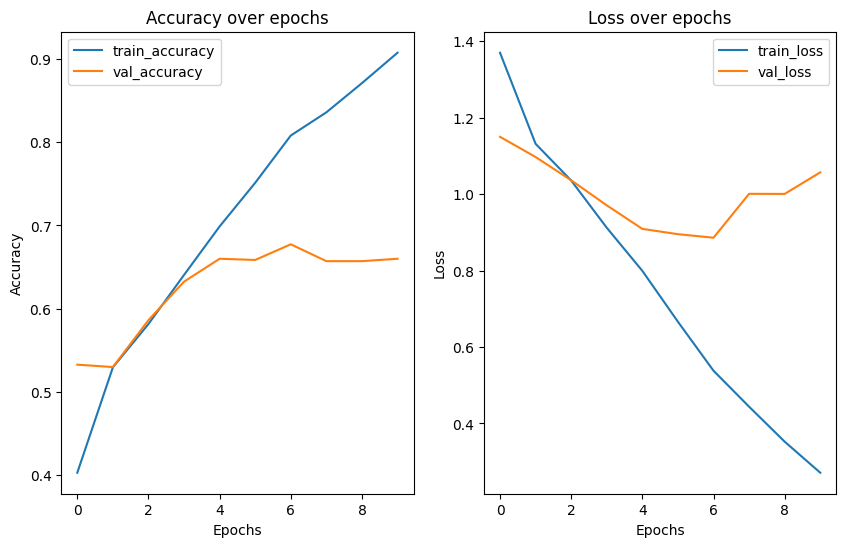

In [36]:
model.plot_accuracy(history)